# Laboratory Session 5
Alessandro Fella 2024285

## Exercise 1

I would assume a binomial distribution as shown below with prob= 0.1933333  and size n= 150

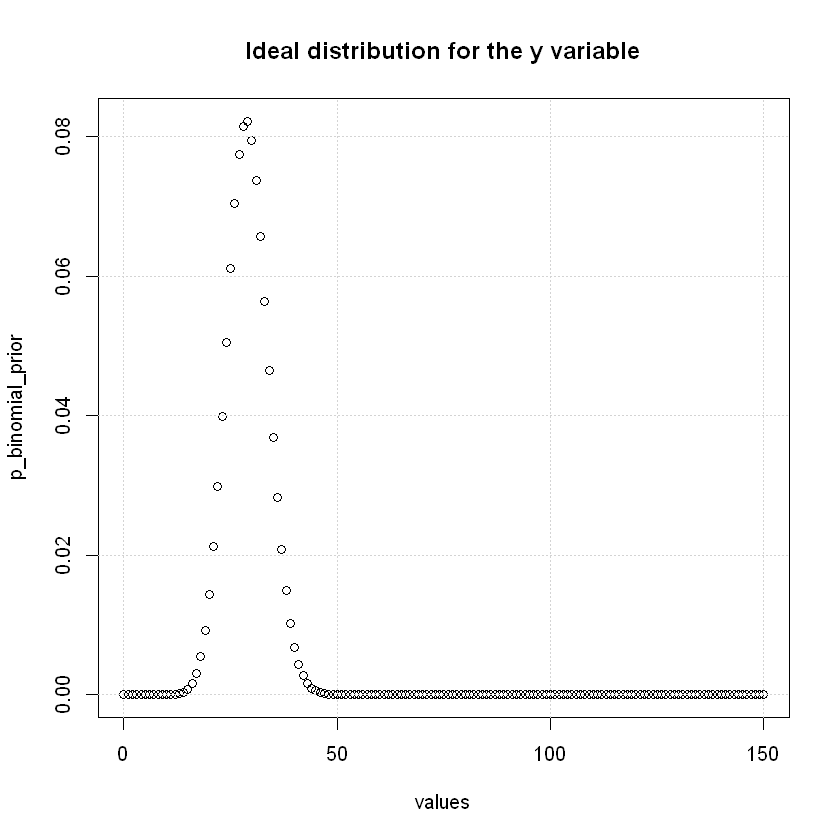

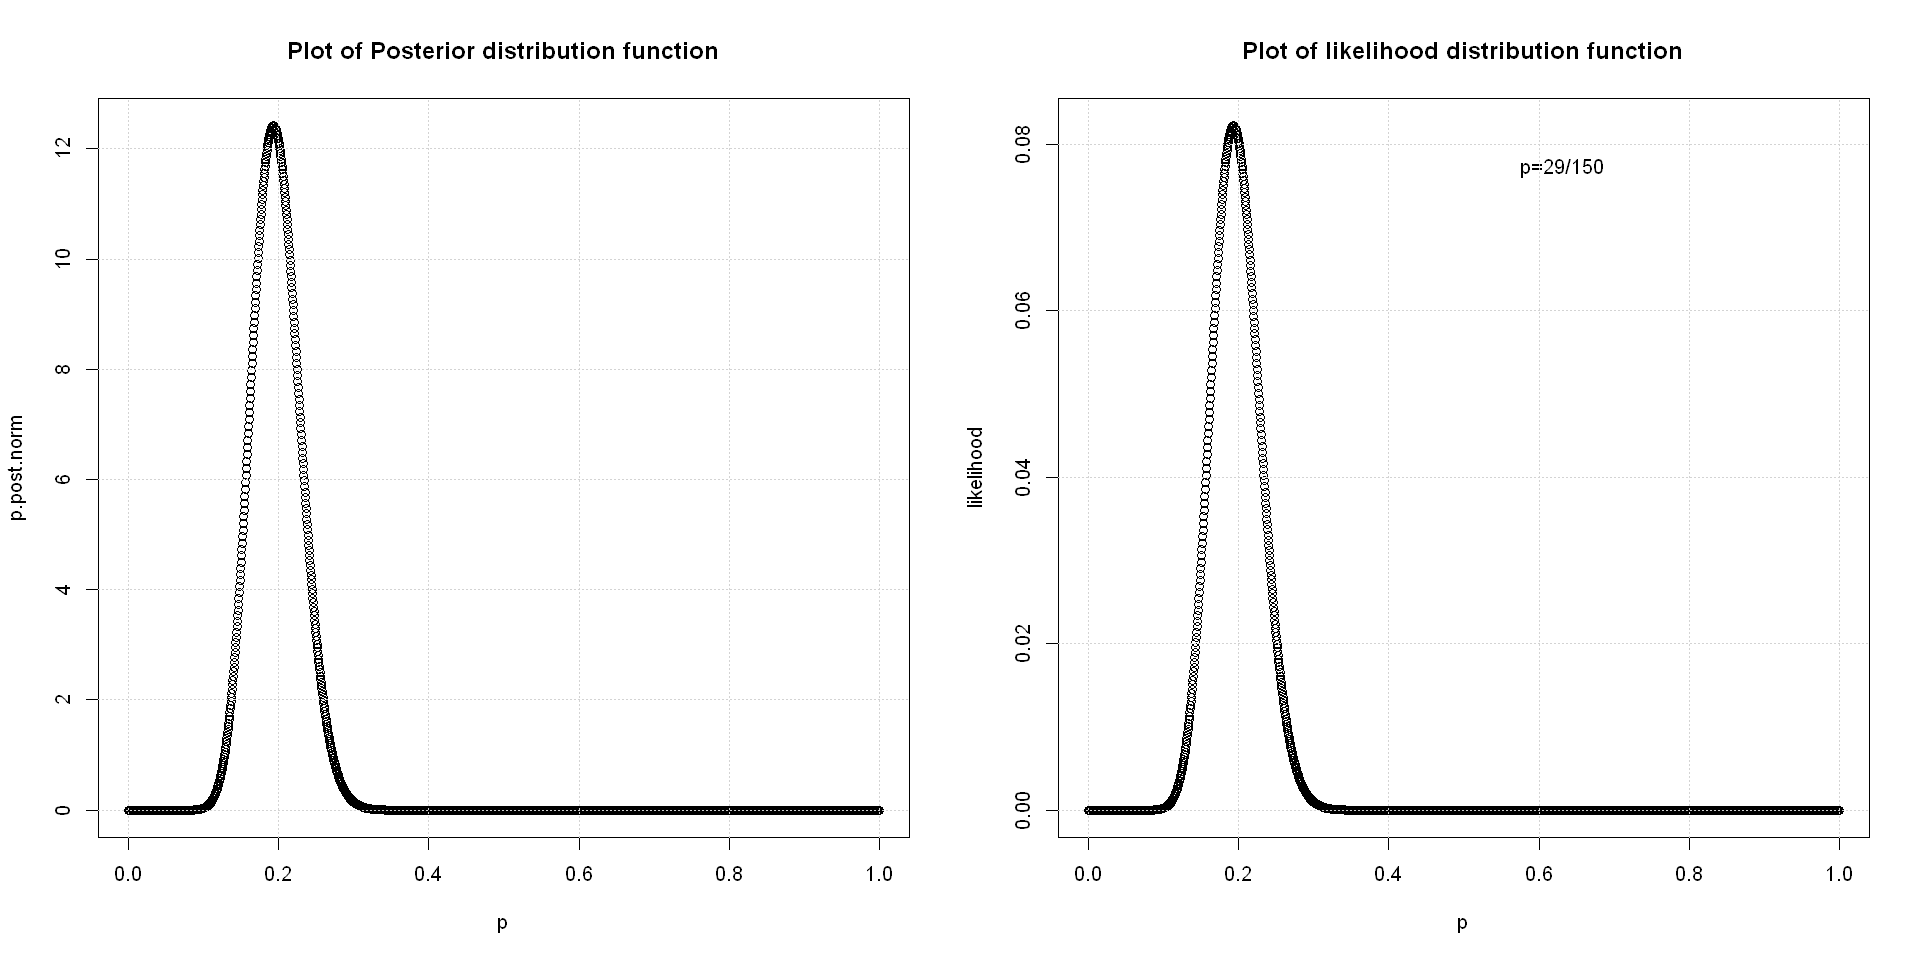

In [1]:
# a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the yournal?
n<-150
r<-29
values<-seq(0,150, 1)
cat("I would assume a binomial distribution as shown below with prob=",29/150," and size n=",n)
p_binomial_prior <- dbinom(x=values,size=n,prob=29/150)
plot(values, p_binomial_prior, ,main = "Ideal distribution for the y variable")
grid()

# b)-c) Assuming a uniform prior, what is the posterior distribution for y ?
#need to compute the evidence (i.e. the normalization factor)
par(mfrow=c(1,2))
options(repr.plot.width=16, repr.plot.height=8)
N <- 2000
delta.p <- 1/N
p <- seq(from=1/(2*N), by=1/N, length.out=N)

# p_prior_unif<-dunif(values, min=0, max=1) 
likelihood <-dbinom(x=r,size=n,prob=p)
p.post.norm <- likelihood/(delta.p*sum(likelihood))
plot(p, p.post.norm, main = "Plot of Posterior distribution function")
grid()
plot(p, likelihood,main = "Plot of likelihood distribution function")
legend("topright", inset=0.05,legend=c("p=29/150"),
       cex=1,box.lty=0)
grid()

## Exercise 2

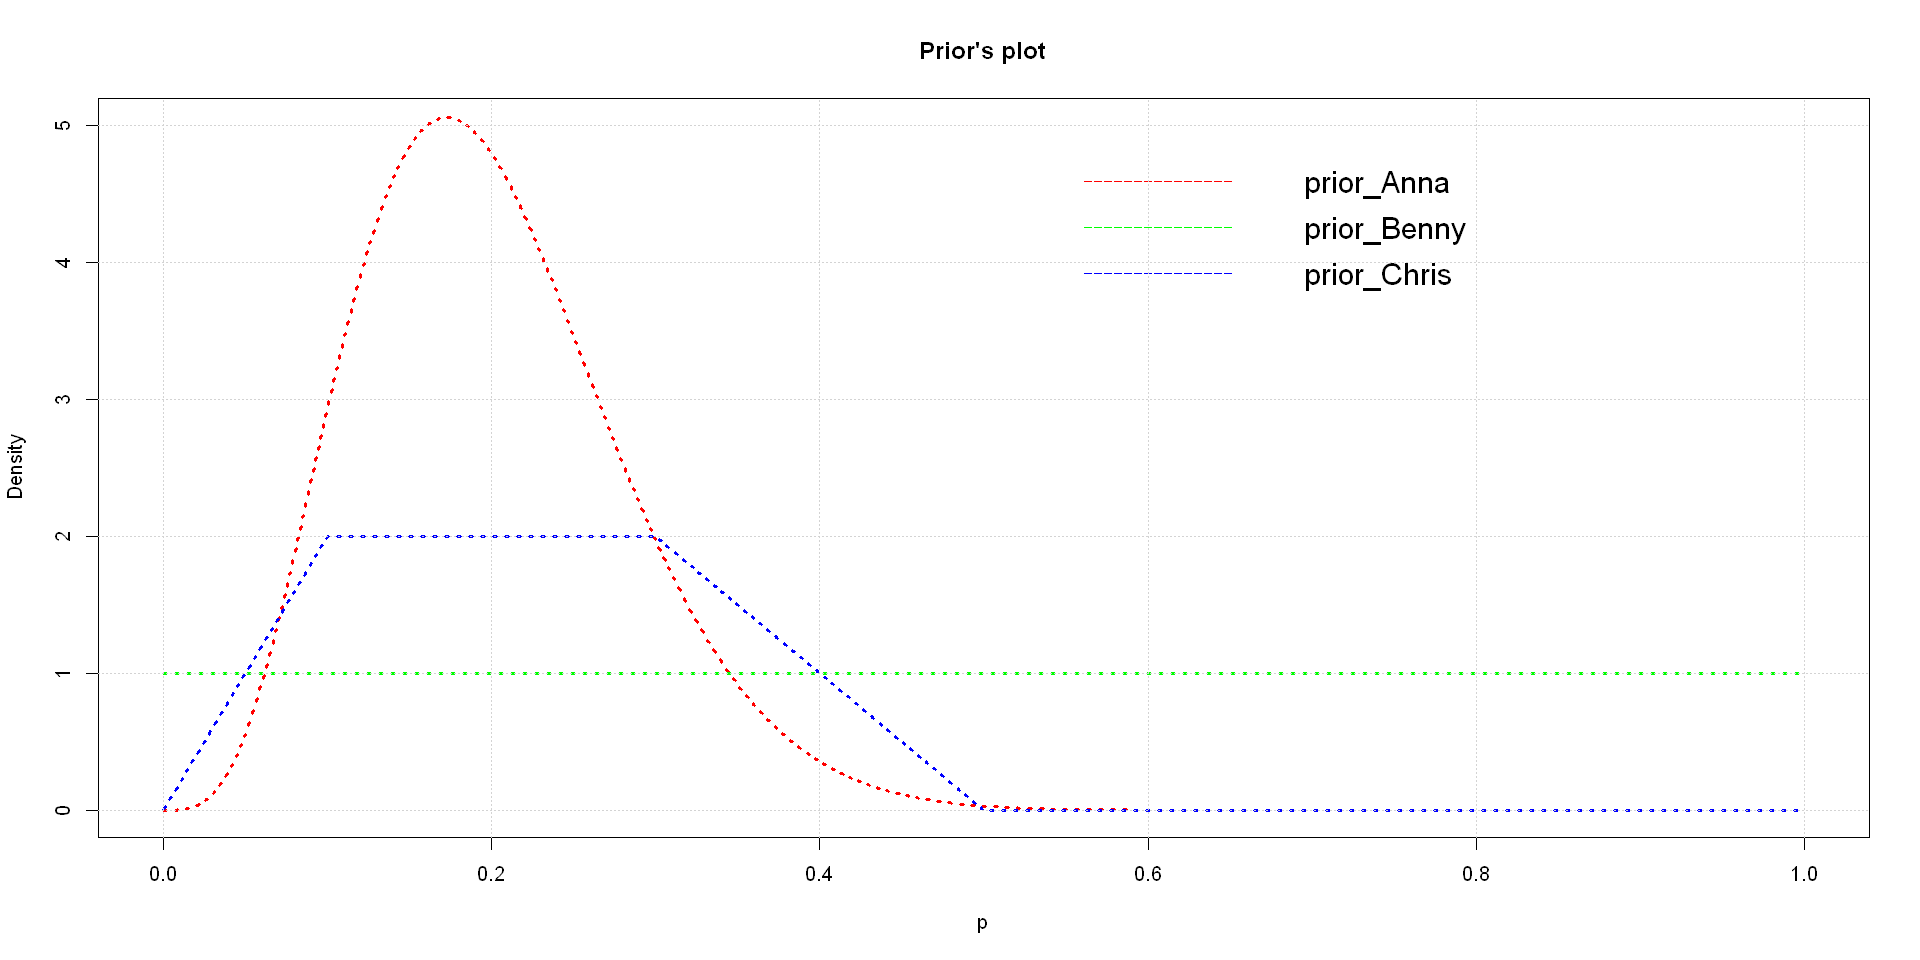

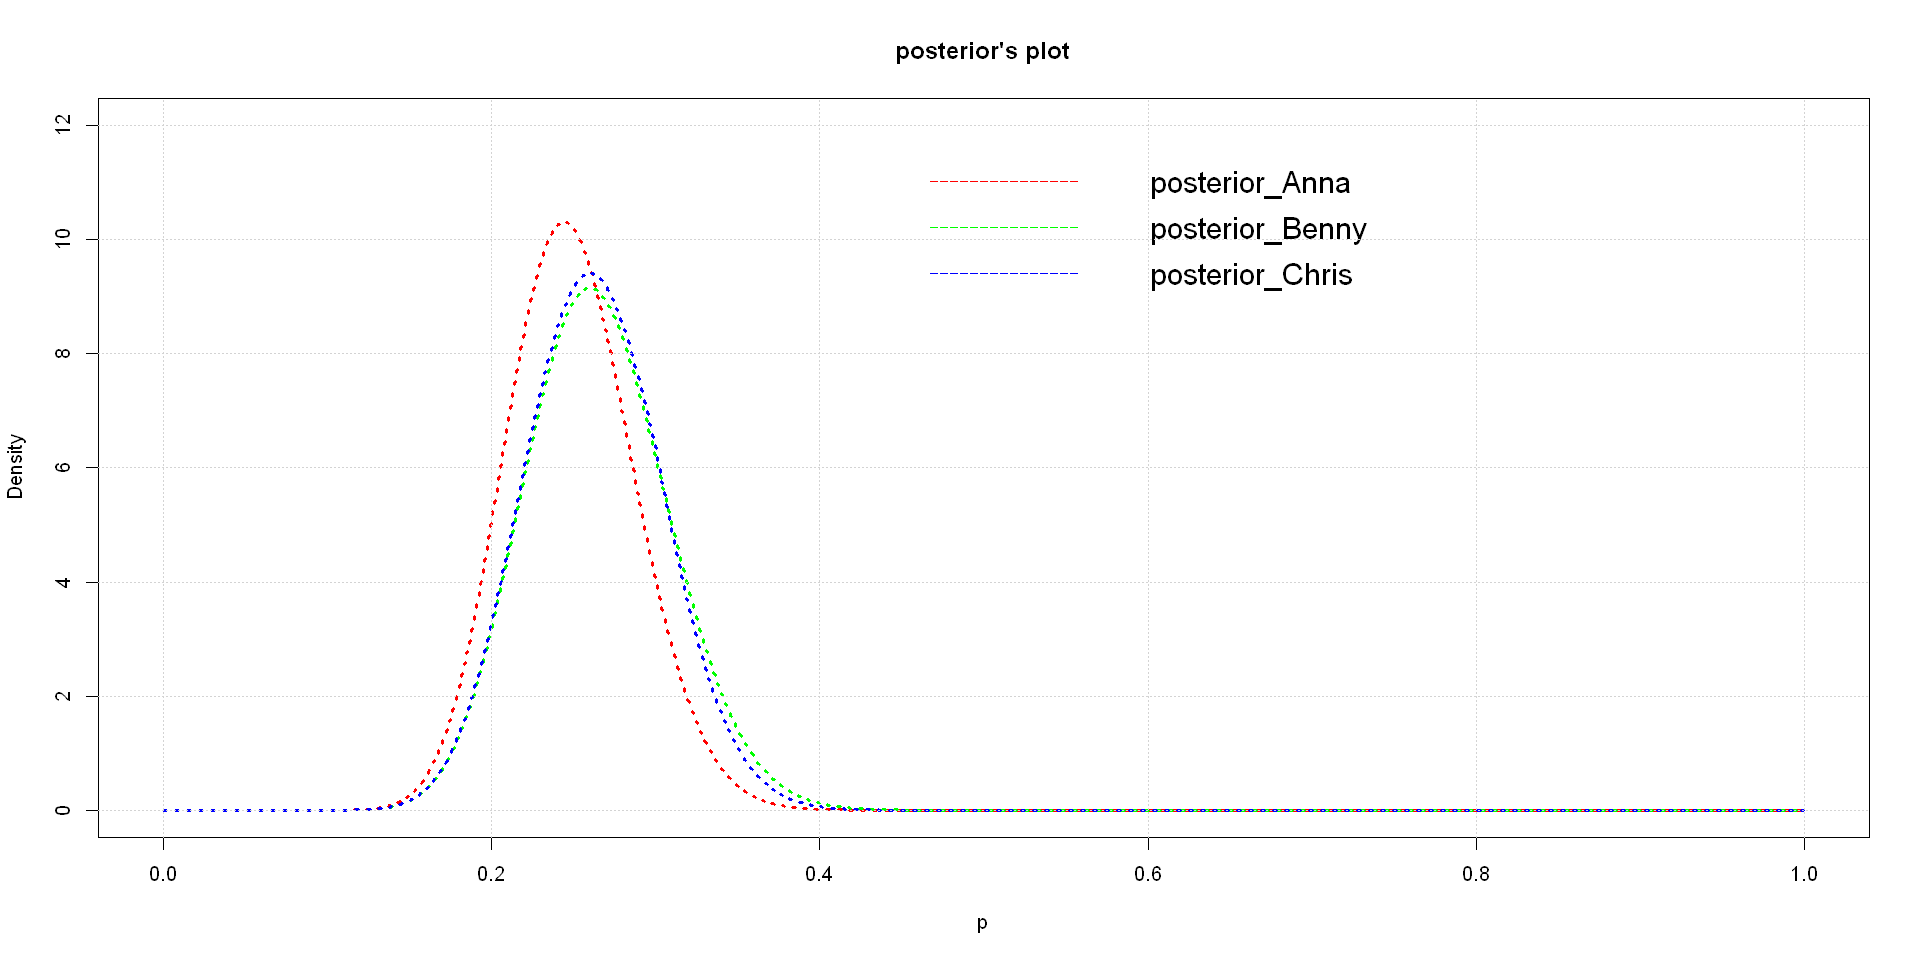

In [2]:
n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample) 


mu <- 0.2
sd <- 0.08 
alpha.prior <-    mu  * (mu*(1-mu)/sd^2 - 1)
beta.prior  <- (1-mu) * (mu*(1-mu)/sd^2 - 1)

trapezoidal<- Vectorize(function(x){(0<= x & x<0.1)*(20*x)+
                         (0.1 <= x & x< 0.3)*(2)+
                         (0.3 <= x & x< 0.5)*(5-10*x)+
                         (x >= 0.5 )*(0)})


prior_Anna<-dbeta(x=p, alpha.prior, beta.prior)
prior_Benny<-dunif(p, min=0, max=1)
prior_Chris<-trapezoidal(p)

plot(p, prior_Anna, col='red', type='l',ylim=c(0,5),
     main = "Prior's plot", lty=3, lwd = 3, xlab="p", 
     ylab='Density')
lines(p, prior_Benny, col='green', type='l',ylim=c(0,5),
     lty=3, lwd = 3, xlab="p", 
     ylab='Density')
lines(p, trapezoidal(p), col='blue', type='l',ylim=c(0,5),
     lty=3, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("prior_Anna","prior_Benny","prior_Chris"),
       col=c("red", "green","blue"), lty=5:5:5, cex=1.5,
       box.lty=0)
grid()

N<-100
yes<-26
#Benny, uniform prior:
n.sample<- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)
likelihood <-dbinom(x=yes,size=N,prob=p)
post_Benny <- likelihood/(delta.p*sum(likelihood))



#Anna, beta prior:
likelihood_Anna<-likelihood/(delta.p*sum(likelihood))
post_Anna<-dbeta(x=p,alpha.prior+yes,beta.prior+N-yes)


#Chris, customized prior:
post_unnormalized<-likelihood*prior_Chris
post_Chris<-post_unnormalized/(delta.p*sum(post_unnormalized))



plot(p, post_Anna, col='red', type='l',ylim=c(0,12),
     main = "posterior's plot", lty=3, lwd = 3, xlab="p", 
     ylab='Density')
lines(p, post_Benny, col='green', type='l',ylim=c(0,12),
     lty=3, lwd = 3, xlab="p", 
     ylab='Density')
lines(p, post_Chris, col='blue', type='l',ylim=c(0,12),
     lty=3, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=c("posterior_Anna","posterior_Benny","posterior_Chris"),
       col=c("red", "green","blue"), lty=5:5:5, cex=1.5,
       box.lty=0)
grid()

In [3]:

#Estimation of the most probable value of the Posterior in different cases
max_anna  <- p[which.max(post_Anna)]
max_benny <- p[which.max(post_Benny)]
max_chris <- p[which.max(post_Chris)]

cat("The most probable value of the Posterior for Anna's Uniform Prior is :\t", max_anna,'\n')
cat("The most probable value of the Posterior for Benny's Uniform Prior is:\t", max_benny,'\n')
cat("The most probable value of the Posterior for Chris's Uniform Prior is:\t", max_chris,'\n')


conflvl = 0.95 
anna_area <- delta.p*cumsum(post_Anna)
benny_area <- delta.p*cumsum(post_Benny)
chris_area <- delta.p*cumsum(post_Chris)


conflvl_func <- function(p,values,conflvl) {
            for(i in 1:(length(values)-1)){
                conflvl_sx <- (1-conflvl)/2           #0.025
                conflvl_dx <- conflvl+(1-conflvl)/2   #0.025
                if ( (values[i+1]>= conflvl_sx) & (values[i] <= conflvl_sx)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (values[i+1]>= conflvl_dx) & (values[i] <= conflvl_dx)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

conf_anna  <- conflvl_func(p, anna_area,conflvl)
conf_benny <- conflvl_func(p,benny_area,conflvl)
conf_chris <- conflvl_func(p,chris_area,conflvl)


cat("Anna Prior:  x1=", conf_anna[1],"x2=", conf_anna[2],'\n')
cat("Benny Prior: x1=", conf_benny[1]," x2=", conf_benny[2],'\n')
cat("Chris Prior: x1=", conf_chris[1],"x2=", conf_chris[2],'\n')


The most probable value of the Posterior for Anna's Uniform Prior is :	 0.24425 
The most probable value of the Posterior for Benny's Uniform Prior is:	 0.26025 
The most probable value of the Posterior for Chris's Uniform Prior is:	 0.26025 
Anna Prior:  x1= 0.1765 x2= 0.3275 
Benny Prior: x1= 0.184  x2= 0.354 
Chris Prior: x1= 0.1835 x2= 0.346 


## Exercise 3

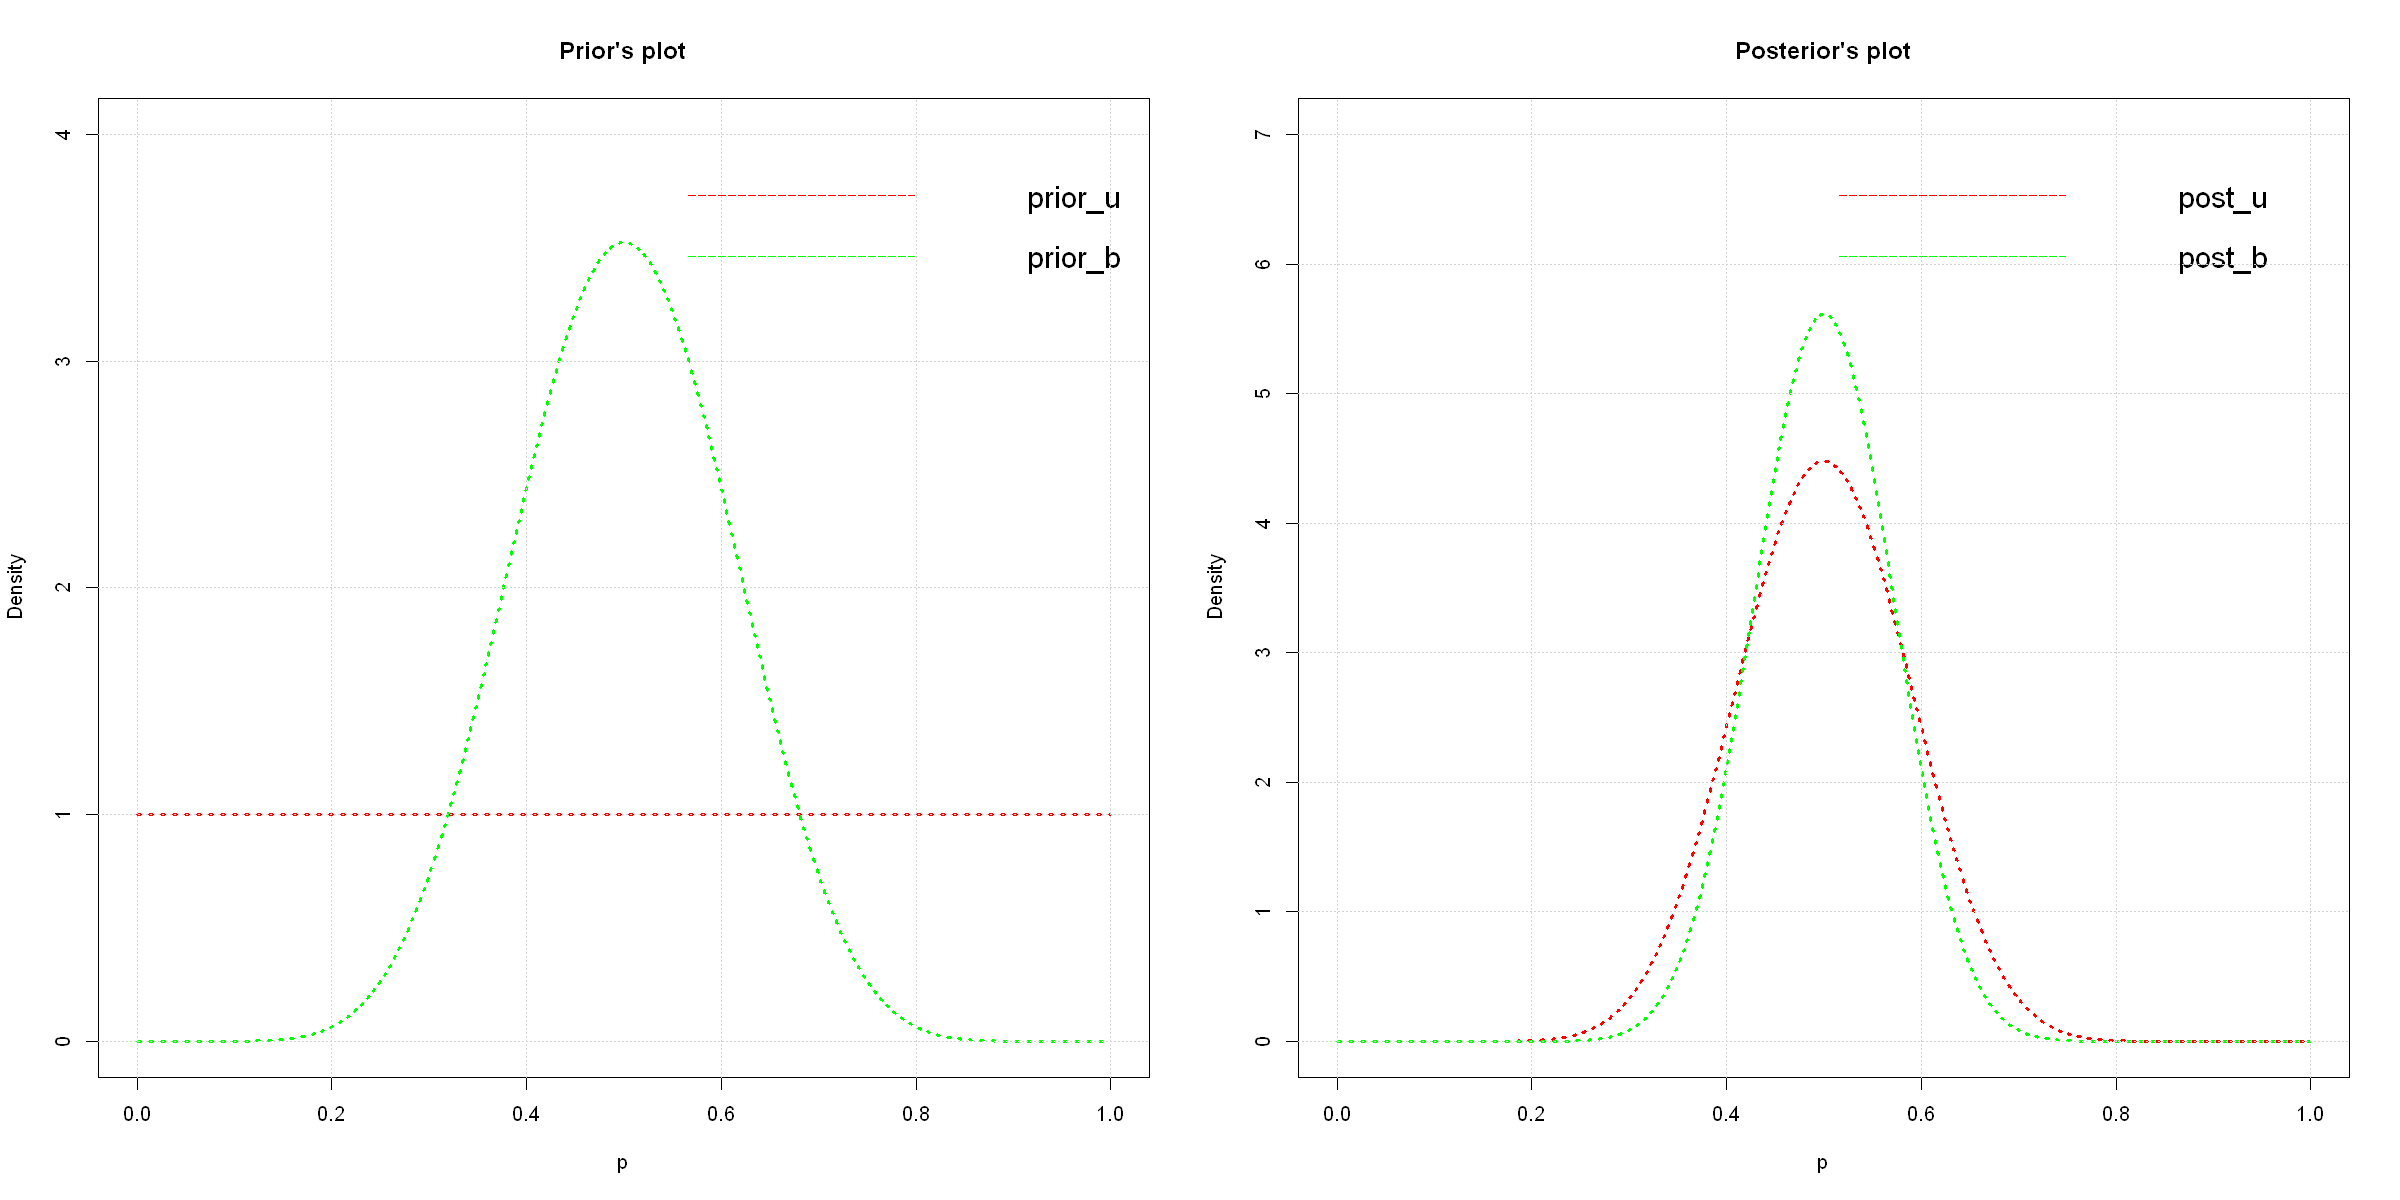

In [4]:
n<- 30 #T+H
H<-15
alpha.prior <-10
beta.prior  <-10
n.sample<- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

#uniform prior:
prior_u<-dunif(p, min=0, max=1)
likelihood_u<-dbinom(x=H,size=n,prob=p)
num_u<-likelihood_u*prior_u
post_u<- num_u/(delta.p*sum(num_u))

# beta prior:
prior_b<-dbeta(x=p, alpha.prior, beta.prior)
likelihood_b_unn <-dbinom(x=H,size=n,prob=p)
likelihood_b<-likelihood_b_unn/(delta.p*sum(likelihood_b_unn))
post_b<-dbeta(x=p,alpha.prior+H,beta.prior+n-H)


plot(p, prior_u, col='red', type='l',ylim=c(0,4),
     main = "Prior's plot", lty=3, lwd = 3, xlab="p", 
     ylab='Density')
lines(p, prior_b, col='green', type='l',ylim=c(0,4),
     lty=3, lwd = 3, xlab="p", 
     ylab='Density')

legend(0.45,4, inset=0.05,legend=c("prior_u","prior_b"),
       col=c("red", "green"), lty=5:5, cex=1.5,
       box.lty=0, box.lwd=1,bty = "n")
grid()

plot(p, post_u, col='red', type='l',ylim=c(0,7),
     main = "Posterior's plot", lty=3, lwd = 3, xlab="p", 
     ylab='Density')
lines(p, post_b, col='green', type='l',ylim=c(0,7),
     lty=3, lwd = 3, xlab="p", 
     ylab='Density')

legend(0.4,7, inset=0.05,legend=c("post_u","post_b"),
       col=c("red", "green"), lty=5:5, cex=1.5,
       box.lty=0, box.lwd=1,bty = "n")

grid()


In [5]:
#Estimation of the most probable value of the Posterior in different cases
max_u  <- p[which.max(post_u)]
max_b<- p[which.max(post_b)]


cat("The most probable value of the green posterior is:", max_u,'\n')
cat("The most probable value of the red posterior is:  ", max_b,'\n')


conflvl = 0.95 
u_area <- delta.p*cumsum(post_u)
b_area <- delta.p*cumsum(post_b)


conflvl_func <- function(p,values,conflvl) {
            for(i in 1:(length(values)-1)){
                conflvl_sx <- (1-conflvl)/2           #0.025
                conflvl_dx <- conflvl+(1-conflvl)/2   #0.025
                if ( (values[i+1]>= conflvl_sx) & (values[i] <= conflvl_sx)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (values[i+1]>= conflvl_dx) & (values[i] <= conflvl_dx)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

conf_u <- conflvl_func(p,u_area,conflvl)
conf_b <- conflvl_func(p,b_area,conflvl)


cat("Anna Prior:  x1=", conf_u[1],"x2=", conf_u[2],'\n')
cat("Benny Prior: x1=", conf_b[1]," x2=", conf_b[2],'\n')


The most probable value of the green posterior is: 0.49975 
The most probable value of the red posterior is:   0.49975 
Anna Prior:  x1= 0.3305 x2= 0.669 
Benny Prior: x1= 0.363  x2= 0.6365 


In [6]:
# c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable
# value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).
out <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 
              'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H')
n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample) 
iteration <- 1:length(out)

#initialization of some variables
prior_u_seq <- 1
prior_b_seq <- 1
max_u_seq <- c(NULL)
max_b_seq <- c(NULL)
x1_u_seq <- c(NULL)
x2_u_seq <- c(NULL)
x1_b_seq <- c(NULL)
x2_b_seq <- c(NULL)
n_seq<-c(NULL)
r_seq<-c(NULL)
for (i in iteration){
        
        out_iteration <- out[1:i]
        n_iteration <- length(out_iteration)    
        r_iteration <- length(out_iteration[out_iteration == 'H']) # Number of heads 
        
        if(out[i]=='H'){
            r<-1
        }else{
            r<-0
        }
        n_seq <- c(n_seq,n_iteration)
        r_seq <- c(r_seq,r_iteration)

        # Flat Prior
        prior_u <- prior_u_seq*dunif(x=p)
                
        # Beta Prior
        alpha <- 10
        beta <- 10
        prior_b <- prior_b_seq*dbeta(x=p, alpha, beta)
        
        #Posterior for Flat 
        p.star <- dbinom(x=r, size=1, prob=p)*prior_u
        post_u <- p.star/(delta.p*sum(p.star))
        
        prior_u_seq <-post_u
    
        #Posterior for Beta 
        post_b <- dbeta(x=p, alpha+r_iteration, beta+n_iteration-r_iteration)

        prior_b_seq <- post_b
    
        # Give an estimate of the most probable value of the Posterior
        max_u  <- p[which.max(post_u)]
        max_b <- p[which.max(post_b)]
    
        max_u_seq <- c(max_u_seq,max_u)
        max_b_seq <- c(max_b_seq,max_b)
    
        # Give an estimate of 95% credibility interval
        area_u <- delta.p*cumsum(post_u)
        area_b <- delta.p*cumsum(post_b)

        cl = 0.95 # Confidence level

        x_u <- conflvl_func(p,area_u,cl)
        x_b <- conflvl_func(p,area_b,cl)
        
        x1_u_seq <- c(x1_u_seq,x_u[1])
        x2_u_seq <- c(x2_u_seq,x_u[2])
        x1_b_seq <- c(x1_b_seq,x_b[1])
        x2_b_seq <- c(x2_b_seq,x_b[2])
    
    
        if(i%%10==0){       


        cat("n=",n_seq[i], "r=",r_seq[i],"\n")
        cat("The most probable value of the Flat posterior is:", max_u_seq[i],'\n')
        cat("The most probable value of the Beta posterior is:", max_b_seq[i],'\n')

        cat("Flat case: [", x1_u_seq[i],",",x2_u_seq[i],']\n')
        cat("Beta case: [", x1_b_seq[i],",",x2_b_seq[i],'] \n')
        }
}
# d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis
# (i.e. considering all the data as a whole) ?


n= 10 r= 3 
The most probable value of the Flat posterior is: 0.30025 
The most probable value of the Beta posterior is: 0.42875 
Flat case: [ 0.109 , 0.6095 ]
Beta case: [ 0.264 , 0.6105 ] 
n= 20 r= 8 
The most probable value of the Flat posterior is: 0.40025 
The most probable value of the Beta posterior is: 0.44725 
Flat case: [ 0.218 , 0.6155 ]
Beta case: [ 0.3005 , 0.6035 ] 
n= 30 r= 15 
The most probable value of the Flat posterior is: 0.49975 
The most probable value of the Beta posterior is: 0.49975 
Flat case: [ 0.3305 , 0.669 ]
Beta case: [ 0.363 , 0.6365 ] 


In [7]:
print("Comparing the two approaches we get the same result because each toss is independent from the other.")

[1] "Comparing the two approaches we get the same result because each toss is independent from the other."
